# Breast cancer prediction using machine learning


Developed By: 

Bishal Aryal

Student ID: 219467146

I have used certain libraries to help me while preparing this model to predict breast cancer. The libraries that I have used are mentioned below:

In [41]:
#importing libraries
import numpy as npy
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sbn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

## Data Collection

The dataset I have used to train the model is Breast Cancer Wisconsin Diagnostic dataset. This dataset can also be accessed via UCI machine learning repository and UW CS ftp server. I downloaded the dataset and used pandas library to read the dataset. The dataset contains 569 rows and 33 columns and also contains null values which will later be removed during data preprocessing. I have also displayed the first 10 and last 10 rows containing values.

In [44]:
#loading the dataset
df = pd.read_csv("data.csv")

In [45]:
#counting rows and columns in the dataset
print("The number of rows: ",df.shape[0])
print("The number of columns: ",df.shape[1])

The number of rows:  569
The number of columns:  33


In [7]:
#displaying first 5 rows
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
#displaying last 5 rows
df.tail(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


## Data pre-processing and visualization

Statistical description of our dataset will help us to understand our dataset better. The dataset I have used contains epmty or unwanted values which will be removed for a cleaner and refined data. The dataset I have used contains 357 (62.74%) benign cases and 212 (37.26%) malignant cases. I have presented this data with the help of pie chart.


The diagnosis based on the features or varaibles in categorized into 'M' and 'B' where 'M' represents malignant and 'B' represents benign. These two categories is later converted into numerical data where 'B' equals to 0 and 'M' equals to 1.


I have I cleansed the dataset to obtain refined data. I have also saved the updated data in a new csv file for further use. I have also analysed the correlation between vairables to see how variables influence diagnosis. I have visualized the correlation using pariplot and heatmap.

In [9]:
#description of our dataset
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [10]:
#checking for empty values
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [11]:
#deleting empty values and updating data
updated_df = df.dropna(axis=1)
df = updated_df
print ("Updated data:")
print ("----------------------")
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

##converting dataframe into csv file
df.to_csv('updated.csv', index=False)

Updated data:
----------------------
Number of rows: 569
Number of columns: 32


In [12]:
#looking at the top 5 rows after deleting null values
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
#Counting number of Malignant(M) or Benign(B) cases
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

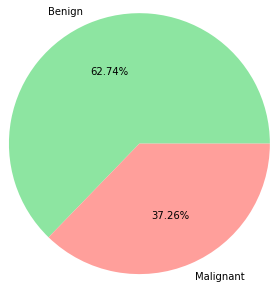

In [14]:
#data visualization using pie chart
data = df['diagnosis'].value_counts()
labels =["Benign","Malignant"]
colors = sbn.color_palette('pastel')[2:4]
plot.pie(data,labels=labels,colors=colors, autopct='%0.2f%%',radius=1.5)
plot.show()

In [15]:
#loking at data types (checking for categorical and numerical data)
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [16]:
#encoding categorical data
labelencoder_Y = LabelEncoder()
df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)

In [17]:
#data after encoding the categorical data (first 5 rows)
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
#data after encoding the categorical data(last 5 rows)
df.tail(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [19]:
#correlation between columns
df.iloc[:,1::].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


Correlation depicts the relationship between variables. We can see that our features and target have positive correlation. I have used pairplot and heatmap to visualize the correlation between features and target. 

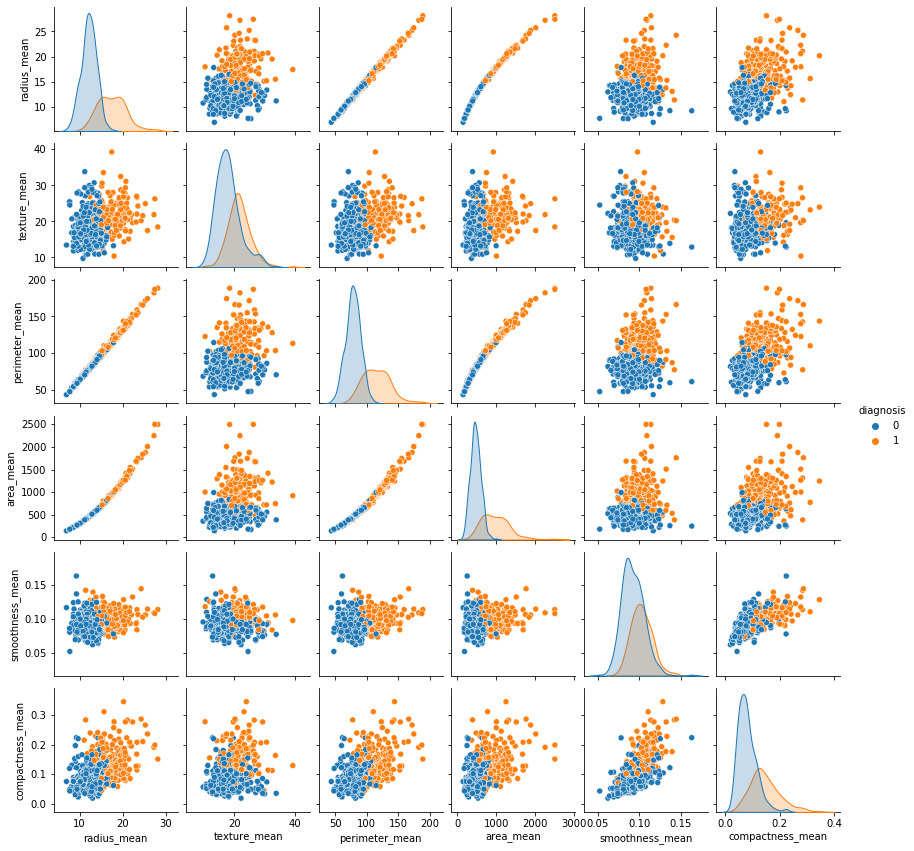

In [20]:
#correlation visualization using pairplot
sbn.pairplot(df.iloc[:,1:8], hue='diagnosis', height=2)

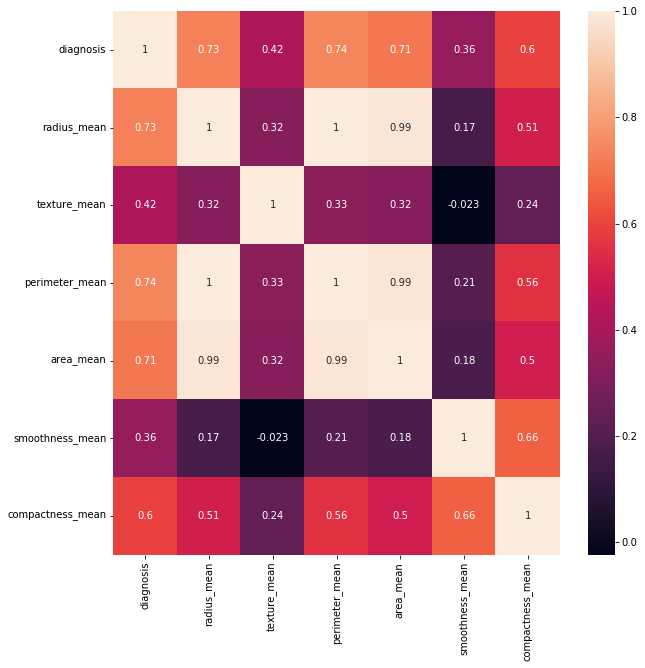

In [21]:
#correaltion visualization using heatmap
figure_size = (10,10)
plot.figure(figsize=figure_size)
sbn.heatmap(df.iloc[:,1:8].corr(), annot=True)

## Data preparation
#### (Splitting data into training and testing data)

Prior to model training I have divided the data into training and testing data. 75% of the data from the dataset will be used for training the model and 25% of the data will be used for testing the model. While splitting the data I have specified random state so that everytime same data will be used for training and testing the model.  

In [22]:
#splitting dataset into dependent and independent data (feature and target)
X = df.iloc[:,2::] #variables (features)
Y = df.iloc[:,1] #daignosis (traget)

In [23]:
#splitting data into training data and testing data (75% training data and 25% testing data)
X_train , X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=2)

## Model Training

Logistic Regression, Decision Tree Classifier and Random Forest Classifier mostly used algorithms for predicting categorical value. They are all efficient classification algorithms.

#### a) Training model using logistic regression

In [24]:
regression_model = LogisticRegression(max_iter=5000, random_state=2)
regression_model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### b) Training model using decision tree classifier

In [25]:
#training model using descision tree classifier
tree_model = DecisionTreeClassifier(criterion='entropy', random_state=2)
tree_model.fit (X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2, splitter='best')

#### c) Training model using random forest classifier

In [26]:
#training model using random forest classifier
forest_model = RandomForestClassifier(criterion='entropy', random_state=2)
forest_model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

## Model Optimization
### (Hyper parameter tuning)

It is important to optimize the model because that way we can use the best possible model for our prototype. Models can be optimized by tuning their hyper parameters. Hyper parameter tuning is the process of selecting best values of the model's input parameters or hyper parameters which will give us an optimized model.Grid Seach technique is used via GridSearchCV available in scikit learn library. GridSearchCV performs hyper parameter tuning and also applies cross-validation.

#### a) Logistic regression model

In [27]:
#hyperparameter tuning of model trained with logistics regression
hyper_parameters ={
    'penalty' : ['l2','none','elasticnet'],
    'C' : [0.05,0.1,0.2]
}

tuned_model = GridSearchCV(regression_model, param_grid=hyper_parameters, cv=10, n_jobs=-1)
lr_model = tuned_model.fit(X_train, Y_train)
regression_model = lr_model.best_estimator_

In [28]:
#testing the accuracy of the model on training data
training_prediction = regression_model.predict(X_train)
training_accuracy = format(accuracy_score(Y_train, training_prediction) * 100, '0.2f')
print(f"Accuracy of the model on training data = {training_accuracy} %")

Accuracy of the model on training data = 98.83 %


#### b) Decision tree classifier model

In [29]:
#tuning model trained with decision tree
hyper_parameters ={
    'criterion' : ['gini' , 'entropy'],
    'max_depth' : [1, 2, 3, 4]
}

tuned_model = GridSearchCV(tree_model, param_grid=hyper_parameters, cv=10, n_jobs=-1)
dt_model = tuned_model.fit(X_train, Y_train)
tree_model = dt_model.best_estimator_

In [30]:
#testing the accuracy of the model on training data
training_prediction = tree_model.predict(X_train)
training_accuracy = format(accuracy_score(Y_train, training_prediction) * 100, '0.2f')
print(f"Accuracy of the model on training data = {training_accuracy} %")

Accuracy of the model on training data = 98.83 %


#### c) Random forest classifier model 


In [31]:
#tuning model trained with random forest classifier
hyper_parameters = {
    'criterion' : ['gini' , 'entropy'],
    'max_depth' : [1, 2, 3, 4],
    'n_estimators' : [25, 50, 100,500]
}

tuned_model = GridSearchCV(forest_model, param_grid=hyper_parameters, cv=10, n_jobs=-1)
best_forest_model = tuned_model.fit(X_train, Y_train)
forest_model = best_forest_model.best_estimator_

In [32]:
#testing the accuracy of the model on training data
training_prediction = forest_model.predict(X_train)
training_accuracy = format(accuracy_score(Y_train, training_prediction) * 100, '0.2f')
print(f"Accuracy of the model on training data = {training_accuracy} %")

Accuracy of the model on training data = 98.59 %


## Model Evaluation

The trained models are now evaluated based on three performance metrics : Accuracy, Precision and Recall (Sensitivity).Confusion matrix is used to get the necessary values to calculate the performance metrics based on which the models will be evaluated. The visualization of confusion matrix gives us the idea about the actual values and the predicted values represented by rows and columns of confusion matrix respectively.)

In [33]:
#function for checking the performance of the models using confusion matrix
def performance_check(Y_test, testing_prediction,model):
    model = model
    cm_labels = model.classes_
    
    cm = confusion_matrix(Y_test, testing_prediction, labels=cm_labels)
    #displaying confusion matrix
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cm_labels)
    cm_display.plot()
    plot.show()
    
    TP = cm[0][0] #true positive
    TN = cm[1][1] #true negative
    FP = cm[1][0] #false positive
    FN = cm[0][1] #false negative
    
    
    #calculating values for performance metrices
    accuracy =  format(((TP+TN)/(TP+TN+FP+FN)) * 100 , '0.2f')
    precision = format((TP / (TP+FP)) * 100 , '0.2f')
    recall = format((TP/ (TP+FN)) * 100, '0.2f')
    
    print(f"Accuracy = {accuracy}%")
    print(f"Precision = {precision}%")
    print(f"Recall = {recall}%")

#### a) Performance of model trained using logistic regression

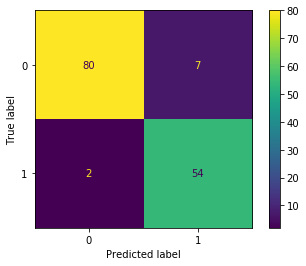

Accuracy = 93.71%
Precision = 97.56%
Recall = 91.95%


In [34]:
#using model on testing data
testing_prediction = regression_model.predict(X_test)
performance_check (Y_test, testing_prediction, regression_model)

#### b) Performance of model trained using decision tree classifier

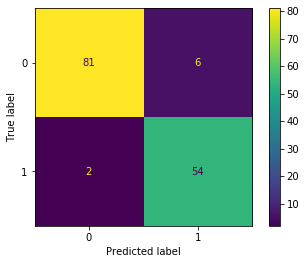

Accuracy = 94.41%
Precision = 97.59%
Recall = 93.10%


In [35]:
#using model on testing data
testing_prediction = tree_model.predict(X_test)
performance_check(Y_test, testing_prediction, tree_model) 

#### c) Performance of model trained using random forest classifier

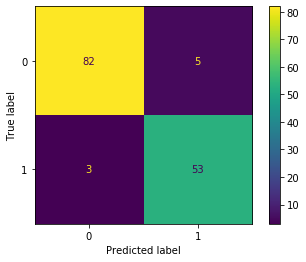

Accuracy = 94.41%
Precision = 96.47%
Recall = 94.25%


In [36]:
#using model on testing data
testing_prediction = forest_model.predict(X_test)
performance_check(Y_test, testing_prediction, forest_model)

## Model Testing

From the above results, we can see that model trained with decision tree classifier and random forest classifier provide better performance than the model trained with logistic regression, with random forest classifier edging decision tree classifier slightly in terms of performance. Now, we'll use that model and feed it with variables 
then let it diagnose the cancer for us.

##### Diagnosis based on input data:

Test material :


1. patient ID :854002, Diagnosis : Malignant (M)

2. patient ID: 857156, Diagnosis : Benign (B)

3. patient ID: 861103, Diagnosis: Benign (B)

4. patient ID: 87880 , Diagnosis: Malignant (M)

5. patient ID: 8911164 , Diagnosis: Benign (B)

6. patient ID: 8915, Diagnosis: Benign (B)

7. patient ID: 901011 , Diagnosis: Benign (B)

8. patient ID: 901041, Diagnosis: Benign (B)

9. patient ID: 901288, Diagnosis: Malignant (M)

10. patient ID: 909445, Diagnosis: Malignant (M)

In [37]:
#a function for performing diagnosis based on the input data
def cancer_diagnosis(input_data, patient_id):
    temp = npy.asarray(input_data) 
    input_data = temp.reshape (1,-1)
    diagnosis = forest_model.predict(input_data)

    if(diagnosis == 1):
        print(f"Patient ID: {patient_id}\n"+ 
              "Diagnosis: Malignant (M)")
    elif(diagnosis == 0):
        print(f"Patient ID: {patient_id}\n"+
              "Diagnosis: Benign (B)")
        
    print("---------------------------------------")

In [38]:
#patient 1
patient_id = 854002
input_data = (19.27,26.47,127.9,1162.0,0.09401,0.1719,0.1657,0.07593,0.1853,0.06261,0.5558,0.6062,3.528,68.17,0.005015,0.03318,0.03497,0.009643,0.01543,0.003896,24.15,30.9,161.4,1813.0,0.1509,0.659,0.6091,0.1785,0.3672,0.1123)
cancer_diagnosis(input_data, patient_id)

#patient 2
patient_id = 857156
input_data = (13.49,22.3,86.91,561.0,0.08752,0.07698,0.04751,0.03384,0.1809,0.05718,0.2338,1.353,1.735,20.2,0.004455,0.01382,0.02095,0.01184,0.01641,0.001956,15.15,31.82,99.0,698.8,0.1162,0.1711,0.2282,0.1282,0.2871,0.06917)
cancer_diagnosis(input_data, patient_id)

#patient 3
patient_id = 861103 
input_data =(11.45,20.97,73.81,401.5,0.1102,0.09362,0.04591,0.02233,0.1842,0.07005,0.3251,2.174,2.077,24.62,0.01037,0.01706,0.02586,0.007506,0.01816,0.003976,13.11,32.16,84.53,525.1,0.1557,0.1676,0.1755,0.06127,0.2762,0.08851)
cancer_diagnosis(input_data, patient_id)

#patient 4
patient_id = 87880
input_data=(13.81,23.75,91.56,597.8,0.1323,0.1768,0.1558,0.09176,0.2251,0.07421,0.5648,1.93,3.909,52.72,0.008824,0.03108,0.03112,0.01291,0.01998,0.004506,19.2,41.85,128.5,1153.0,0.2226,0.5209,0.4646,0.2013,0.4432,0.1086)
cancer_diagnosis(input_data, patient_id)

#patient 5
patient_id = 8911164
input_data =(11.89,17.36,76.2,435.6,0.1225,0.0721,0.05929,0.07404,0.2015,0.05875,0.6412,2.293,4.021,48.84,0.01418,0.01489,0.01267,0.0191,0.02678,0.003002,12.4,18.99,79.46,472.4,0.1359,0.08368,0.07153,0.08946,0.222,0.06033)
cancer_diagnosis(input_data, patient_id)

#patient 6
patient_id = 8915
input_data = (14.96,19.1,97.03,687.3,0.08992,0.09823,0.0594,0.04819,0.1879,0.05852,0.2877,0.948,2.171,24.87,0.005332,0.02115,0.01536,0.01187,0.01522,0.002815,16.25,26.19,109.1,809.8,0.1313,0.303,0.1804,0.1489,0.2962,0.08472)
cancer_diagnosis(input_data, patient_id)

#patient 7
patient_id = 901011
input_data = (11.14,14.07,71.24,384.6,0.07274,0.06064,0.04505,0.01471,0.169,0.06083,0.4222,0.8092,3.33,28.84,0.005541,0.03387,0.04505,0.01471,0.03102,0.004831,12.12,15.82,79.62,453.5,0.08864,0.1256,0.1201,0.03922,0.2576,0.07018)
cancer_diagnosis(input_data, patient_id)

#patient 8
patient_id = 901041 
input_data = (13.3,21.57,85.24,546.1,0.08582,0.06373,0.03344,0.02424,0.1815,0.05696,0.2621,1.539,2.028,20.98,0.005498,0.02045,0.01795,0.006399,0.01829,0.001956,14.2,29.2,92.94,621.2,0.114,0.1667,0.1212,0.05614,0.2637,0.06658)
cancer_diagnosis(input_data, patient_id)

#patient 9
patient_id = 901288
input_data = (20.64,17.35,134.8,1335.0,0.09446,0.1076,0.1527,0.08941,0.1571,0.05478,0.6137,0.6575,4.119,77.02,0.006211,0.01895,0.02681,0.01232,0.01276,0.001711,25.37,23.17,166.8,1946.0,0.1562,0.3055,0.4159,0.2112,0.2689,0.07055)
cancer_diagnosis(input_data, patient_id)

#patient 10
patient_id = 909445
input_data = (17.27,25.42,112.4,928.8,0.08331,0.1109,0.1204,0.05736,0.1467,0.05407,0.51,1.679,3.283,58.38,0.008109,0.04308,0.04942,0.01742,0.01594,0.003739,20.38,35.46,132.8,1284.0,0.1436,0.4122,0.5036,0.1739,0.25,0.07944)
cancer_diagnosis(input_data, patient_id)


Patient ID: 854002
Diagnosis: Malignant (M)
---------------------------------------
Patient ID: 857156
Diagnosis: Benign (B)
---------------------------------------
Patient ID: 861103
Diagnosis: Benign (B)
---------------------------------------
Patient ID: 87880
Diagnosis: Malignant (M)
---------------------------------------
Patient ID: 8911164
Diagnosis: Benign (B)
---------------------------------------
Patient ID: 8915
Diagnosis: Benign (B)
---------------------------------------
Patient ID: 901011
Diagnosis: Benign (B)
---------------------------------------
Patient ID: 901041
Diagnosis: Benign (B)
---------------------------------------
Patient ID: 901288
Diagnosis: Malignant (M)
---------------------------------------
Patient ID: 909445
Diagnosis: Malignant (M)
---------------------------------------


The values of 10 patients were used as input for our model and the model was able to successfully predict the values of all 10 patients correctly based on the input data.
